## Interbay Giving Garden Historic Data
Cleaning and combining harvest data for the past 11 years.

In [3]:
%matplotlib inline
# Imports
import datetime as dt
from dateutil.parser import parse
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
import pandas as pd

## Import Data
All csv files located in a subdirectory `Clean Data` in the working directory.

In [4]:
dpath = r'./Clean Data/'
files = listdir('Clean Data')

all_data = pd.DataFrame()

for fname in files :
    fpath = dpath + fname
    try :
        if 'individual' in fname :
            df = pd.read_csv(fpath)
            all_data = pd.concat([all_data, df])
        elif 'giving' in fname :
            df = pd.read_csv(fpath)
            df.insert(2, 'gardener', 'Giving Garden', allow_duplicates = False)
            all_data = pd.concat([all_data, df])
        else :
            print('Skipping', fname)
            break
        print('Loaded', fname)
    except :
        print('Error loading', fname)
        break

all_data.reset_index(drop = True, inplace = True)
all_data['date'] = [dt.date.isoformat(parse(d)) for d in all_data['date']]
all_data['produce'] = [p.lower() for p in all_data['produce']]
all_data['week'] = [dt.date.isocalendar(parse(d))[1] for d in all_data['date']]
all_data['year'] = [dt.date.isocalendar(parse(d))[0] for d in all_data['date']]
all_data['gg'] = [g if g == 'Giving Garden' else 'Individual' for g in all_data['gardener']]

Loaded giving_garden_2020.csv
Loaded giving_garden_2013.csv
Loaded giving_garden_2010.csv
Loaded giving_garden_2017.csv
Loaded giving_garden_2012.csv
Loaded individuals_2012.csv
Loaded giving_garden_2018.csv
Loaded individuals_2011.csv
Loaded individuals_2020.csv
Loaded individuals_2013.csv
Loaded giving_garden_2011.csv
Loaded giving_garden_2014.csv
Loaded individuals_2014.csv
Loaded individuals_2010.csv
Loaded giving_garden_2009.csv


### Offline Handling
Get list of unique produce names, export to `produce_list.csv` for offline handling. 

In [5]:
p = sorted(all_data['produce'].unique())
np.savetxt('produce_list.csv', p, delimiter = ', ', fmt ='% s')

In [6]:
# See README.md for a little more info on how `produce_map.csv` is created.
mapping = pd.read_csv('produce_mapping.csv', delimiter = ',')
if len(p) != len(mapping) :
    print('Mapping error, lists of differing lengths.')
    
produce = pd.DataFrame(data = {'produce' : p})
produce = produce.join(mapping)
produce.head()

,produce,prod_name,generic_name,prod_group
0,apples,apples,apples,fruit
1,"apples, green",green apples,apples,fruit
2,armenian cucumbers,armenian cucumbers,cucumbers,cucumbers
3,artichokes,artichokes,artichokes,artichokes
4,arugula,arugula,arugula,herbs


### Master File
Merge harvest data with produce mapping table to create unified dataset; exported to csv.

In [7]:
complete = pd.merge(left = all_data, 
                  right = produce, 
                  on = 'produce')
complete.to_csv('Giving Garden Combined.csv')

## Summaries
Looking at totals over time and by produce group.

### Totals by Year

In [8]:
summ = complete[['year', 'week', 'gg', 'generic_name', 'prod_group', 'weight']]
pd.pivot_table(summ, values = 'weight', aggfunc = 'sum', index = 'gg', columns = 'year', margins = True, margins_name = 'Total').fillna(0)

year,2009,2010,2011,2012,2013,2014,2017,2018,2020,Total
gg,,,,,,,,,,
Giving Garden,1995.5,2784.5,2493.5,2456.0,2016.6,2387.5,1058.0,1221.25,1131.450,17544.300
Individual,0.0,1290.0,1451.0,2192.0,1660.5,1697.0,0.0,0.00,777.475,9067.975
Total,1995.5,4074.5,3944.5,4648.0,3677.1,4084.5,1058.0,1221.25,1908.925,26612.275


In [9]:
pd.pivot_table(summ, values = 'weight', aggfunc = 'sum', index = ('prod_group', 'generic_name'), columns = 'year').fillna(0)

,year,2009,2010,2011,2012,2013,2014,2017,2018,2020
prod_group,generic_name,,,,,,,,,
artichokes,artichokes,0.00,0.0,0.0,2.0,0.0,0.0,0.0,4.75,0.000
baked goods,brownies,0.00,0.0,3.0,0.0,0.0,0.0,0.0,0.00,0.000
broccoli,broccoli,7.00,0.5,7.5,11.5,1.0,13.5,0.0,0.00,10.000
cauliflower,cauliflower,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000
celery,celery,0.00,10.5,12.5,4.0,6.0,0.0,0.0,0.00,0.000
chard,chard,208.00,281.0,291.0,362.0,426.5,250.5,0.0,78.25,141.300
cucumbers,cucumbers,51.75,22.0,32.0,12.0,100.0,204.5,0.0,97.50,195.025
eggplant,eggplant,0.00,0.0,0.0,0.0,2.0,0.5,0.0,0.00,0.000
flowers,flowers,0.00,0.0,0.0,0.5,0.0,0.0,0.0,0.00,0.000


### 2020 Summary

In [10]:
summ20 = summ[['week', 'gg', 'generic_name', 'prod_group', 'weight']][summ['year'] == 2020]
pd.pivot_table(summ20, values = 'weight', aggfunc = 'sum', index = ('prod_group', 'generic_name'), columns = 'gg', margins = True)

gg                              Giving Garden  Individual       All
prod_group       generic_name                                      
broccoli         broccoli                8.50       1.500    10.000
chard            chard                  60.50      80.800   141.300
cucumbers        cucumbers              97.70      97.325   195.025
fruit            apples                 77.00      12.000    89.000
                 plums                   4.00         NaN     4.000
green beans      green beans            53.60      39.500    93.100
herbs            arugula                  NaN       1.000     1.000
                 basil                   5.55         NaN     5.550
                 chives                  1.50         NaN     1.500
                 herbs                   2.00         NaN     2.000
                 parsley                25.50         NaN    25.500
leafy vegetables cabbage                 1.60       7.400     9.000
                 greens                 64.95       4.750    69.700
                 kale                  143.40      40.250   183.650
                 lettuce                57.80      14.600    72.400
                 spinach                34.35       8.000    42.350
onions           green onions            0.75       1.000     1.750
                 leeks                    NaN      10.500    10.500
                 onions                  4.50      38.100    42.600
peas             peas                    1.00       2.000     3.000
peppers          peppers                 1.00       2.000     3.000
rhubarb          rhubarb                  NaN      16.000    16.000
root vegetables  beets                  25.50      36.050    61.550
                 carrots                 3.00       1.000     4.000
                 radish                  9.25         NaN     9.250
squash           squash                 27.00      39.800    66.800
                 summer squash         341.30     179.500   520.800
                 winter squash           8.50         NaN     8.500
tomatoes         tomatoes               71.70     144.400   216.100
All                                   1131.45     777.475  1908.925

#### Weekly Harvest Trends

In [11]:
pd.pivot_table(summ20[['week', 'gg', 'weight']], 
               values = 'weight', aggfunc = 'sum', 
               index = 'week', columns = 'gg', 
               margins = True, margins_name = 'Total').fillna(0)

gg,Giving Garden,Individual,Total
week,,,
21,32.00,0.000,32.000
22,25.00,1.000,26.000
23,34.50,8.000,42.500
24,24.75,11.750,36.500
25,19.75,9.500,29.250
26,39.25,2.000,41.250
27,26.25,12.750,39.000
28,38.50,12.500,51.000
29,57.75,47.000,104.750


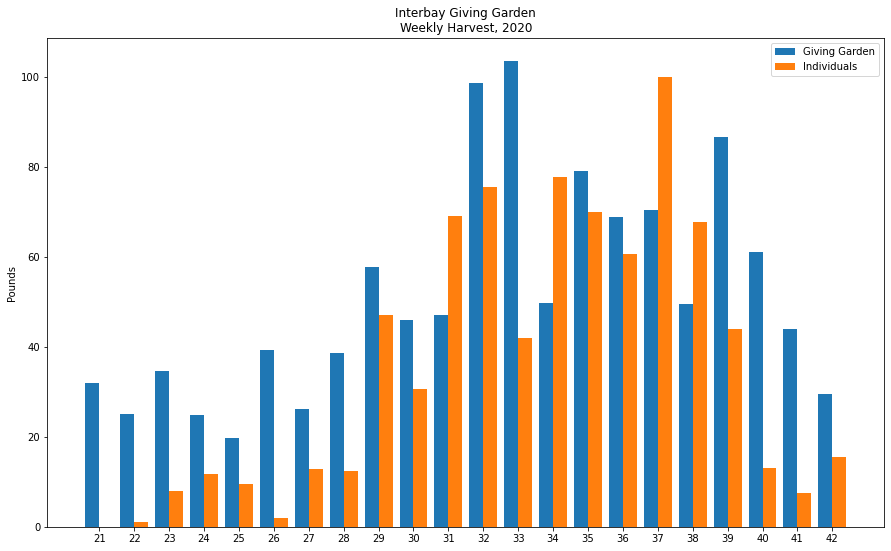

In [12]:
# Setup bar chart showing poundage by week
x_labels = sorted(summ20['week'].unique().tolist())
gg = summ20[summ20['gg'] == 'Giving Garden'].groupby('week').sum()['weight']
ind = summ20[summ20['gg'] == 'Individual'].groupby('week').sum()['weight']
weekly = pd.concat({'gg' : gg, 'ind' : ind},  axis = 1).fillna(0)

fig, ax = plt.subplots(figsize=(15, 9))
width = .4
x = np.arange(len(x_labels))
y1 = weekly['gg']
y2 = weekly['ind']

ax1 = ax.bar(x - width/2, y1, width, label='Giving Garden')
ax2 = ax.bar(x + width/2, y2, width, label='Individuals')

ax.set_ylabel('Pounds')
ax.set_title('Interbay Giving Garden\nWeekly Harvest, 2020')
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.legend()

plt.show()

In [13]:
# Top harvest by week?

In [15]:
len(all_data['week'].unique())

34

NameError: name 'all_data' is not defined